This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [2]:
import os
os.sys.path.append('../../')

In [3]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the EMD between 2b and 4b

Lets see what the EMD for each feature is between 2b and 4b

In [4]:
import mplhep as hep
hep.set_style("ATLAS") # string aliases work too

In [5]:
from scipy.stats import wasserstein_distance

In [6]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/

total 36G
-rw-r--r-- 1 lborgna users 434M Apr  5 17:08 data_2B_SRshift_16.root
-rw-r--r-- 1 lborgna users 527M Apr  8 20:05 data_2B_SRshift_16_with_weights.root
-rw-r--r-- 1 lborgna users 404M Apr  5 17:17 data_2B_SRshift_17.root
-rw-r--r-- 1 lborgna users 478M Apr  8 20:06 data_2B_SRshift_17_with_weights.root
-rw-r--r-- 1 lborgna users 947M Apr  5 17:28 data_2B_SRshift_18.root
-rw-r--r-- 1 lborgna users 1.2G Apr  8 20:07 data_2B_SRshift_18_with_weights.root
-rw-r--r-- 1 lborgna users 4.0G Apr 16 15:04 data_2B_SRshift_fmp_16.root
-rw-r--r-- 1 lborgna users 3.8G Apr 20 17:58 data_2B_SRshift_fmp_17.root
-rw-r--r-- 1 lborgna users 8.6G Apr 20 18:08 data_2B_SRshift_fmp_18.root
-rw-r--r-- 1 lborgna users 421M Apr 14 11:06 data_CRVRSR_16.root
-rw-r--r-- 1 lborgna users 392M Apr 14 11:06 data_CRVRSR_17.root
-rw-r--r-- 1 lborgna users 915M Apr 14 11:08 data_CRVRSR_18.root
-rw-r--r-- 1 lborgna users 509M Apr 22 04:01 data_CRVRSR_2B_SRshift_16_NN_100_bootstraps.root
-rw-r--r-- 1 lborgna users 53

In [7]:
storage = "/mnt/storage/lborgna/NNT/MDR_VEC/data/"

In [8]:
fp_16 = storage + "data_2B_SRshift_16_with_weights.root"

In [9]:
f_16 = uproot.open(fp_16)

In [10]:
from hh4b_utils.nnt_tools import load_nnt

In [11]:
df_16 = load_nnt(fp_16)

100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


In [16]:
mask_2b = df_16['ntag'] == 2
mask_4b = df_16['ntag'] >= 4
mask_cr = df_16['kinematic_region'] == 2
mask_vr = df_16['kinematic_region'] == 1
mask_sr = df_16['kinematic_region'] == 0

In [21]:
rw_cols_log = ['pT_2_log',
  'pT_4_log',
  'eta_i',
  'dRjj_1_log',
  'dRjj_2_log',
  'njets',
  'pt_hh_log',
  'X_wt_log',
  'dR_hh',
  'dPhi_h1',
  'dPhi_h2']

In [22]:
for col in df_16.columns:
    print(col)

run_number
event_number
pass_vbf_sel
mc_sf
trig_sf
jet_trig_sfs
truth_mhh
ntag
njets
kinematic_region
m_min_dj
m_max_dj
pairing_score_1
pairing_score_2
bkt_lead_jet_pt
bkt_lead_jet_tag
second_jet_pt
second_jet_tag
third_jet_pt
third_jet_tag
fourth_jet_pt
fourth_jet_tag
bkt_HT
bucket_passed
cos_theta_star
m_hh_cor
m_hh
pt_hh
dEta_hh
X_wt_tag
X_wt_notag
X_wt_nonHCWjets
trig_bucket
m_h1
E_h1
pT_h1
eta_h1
phi_h1
m_h2
E_h2
pT_h2
eta_h2
phi_h2
m_h1_j1
E_h1_j1
pT_h1_j1
eta_h1_j1
phi_h1_j1
tag_h1_j1
quantile_h1_j1
angle_h1_j1
m_h1_j2
E_h1_j2
pT_h1_j2
eta_h1_j2
phi_h1_j2
tag_h1_j2
quantile_h1_j2
angle_h1_j2
m_h2_j1
E_h2_j1
pT_h2_j1
eta_h2_j1
phi_h2_j1
tag_h2_j1
quantile_h2_j1
angle_h2_j1
m_h2_j2
E_h2_j2
pT_h2_j2
eta_h2_j2
phi_h2_j2
tag_h2_j2
quantile_h2_j2
angle_h2_j2
pT_4
pT_2
eta_i
dRjj_1
dRjj_2
m_vbf_j1
E_vbf_j1
pT_vbf_j1
eta_vbf_j1
phi_vbf_j1
tagged_vbf_j1
m_vbf_j2
E_vbf_j2
pT_vbf_j2
eta_vbf_j2
phi_vbf_j2
tagged_vbf_j2
vbf_mjj
vbf_dEtajj
vbf_pTvecsum
2b1j
2b2j
BKT_passed
BKT1_trigger
BKT2_t

In [23]:
from eda_tools.utilities import calculatedPhi, calculatedRhh

In [24]:
calculatedPhi(df_16)
calculatedRhh(df_16)

In [25]:
df_16['dPhi_h2'].describe([0.05,0.95])

count    1.915533e+06
mean     1.105221e+00
std      6.038821e-01
min      5.364418e-07
5%       1.423560e-01
50%      1.104609e+00
95%      2.109273e+00
max      3.141552e+00
Name: dPhi_h2, dtype: float64

In [26]:
features = ['njets','m_hh', 'pt_hh','dEta_hh','X_wt_tag','pT_4','pT_2','eta_i','dRjj_1','dRjj_2','dR_hh','dPhi_h1','dPhi_h2']
nbins = [8, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
#hrange = [(4, 12), (200, 1200), (0, 500), (0, 1.5), (1.5, 12), (0, 125), (0, 200), (0, 2), (0, 2.5), (0, 3.5),(0, 3.5), (0, 2.5),(0, 2.5)]

In [27]:
len(nbins)

13

In [28]:
len(hrange)

13

In [29]:
len(features)

13

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaled = scaler.fit_transform(df_16[features])

In [35]:
scaler.mean_

array([  4.28916704, 427.88466195,  50.87886975,   0.73304486,
         3.73523265,  56.60119566,  99.74364122,   0.90341438,
         1.26999856,   1.71219336,   3.05315347,   0.89098165,
         1.1052212 ])

In [38]:
np.mean(df_16[features])

njets         4.289167
m_hh        427.884613
pt_hh        50.878864
dEta_hh       0.733045
X_wt_tag      3.735233
pT_4         56.601170
pT_2         99.743645
eta_i         0.903414
dRjj_1        1.269999
dRjj_2        1.712193
dR_hh         3.053153
dPhi_h1       0.890982
dPhi_h2       1.105221
dtype: float64

In [39]:
np.std(df_16[features])

njets         0.572056
m_hh        112.506989
pt_hh        37.393883
dEta_hh       0.431203
X_wt_tag      1.420996
pT_4         14.531350
pT_2         39.348801
eta_i         0.355118
dRjj_1        0.338523
dRjj_2        0.459962
dR_hh         0.231604
dPhi_h1       0.502738
dPhi_h2       0.603882
dtype: float64

In [40]:
np.sqrt(scaler.var_)

array([  0.57205614, 112.5069906 ,  37.39388227,   0.43120316,
         1.42099621,  14.53135048,  39.34879934,   0.35511803,
         0.33852313,   0.45996229,   0.23160404,   0.50273806,
         0.60388192])

In [41]:
df_test = df_16.copy()

In [42]:
df_test[features] = (df_test[features] - np.mean(df_16[features]))/np.std(df_16[features])

In [53]:
df_16[features] = (df_16[features] - np.mean(df_16[features])) / np.std(df_16[features])

In [49]:
scaled[:,1]

array([ 0.86239688, -1.31671305, -0.85510789, ..., -1.14763827,
        0.15762351, -0.91442875])

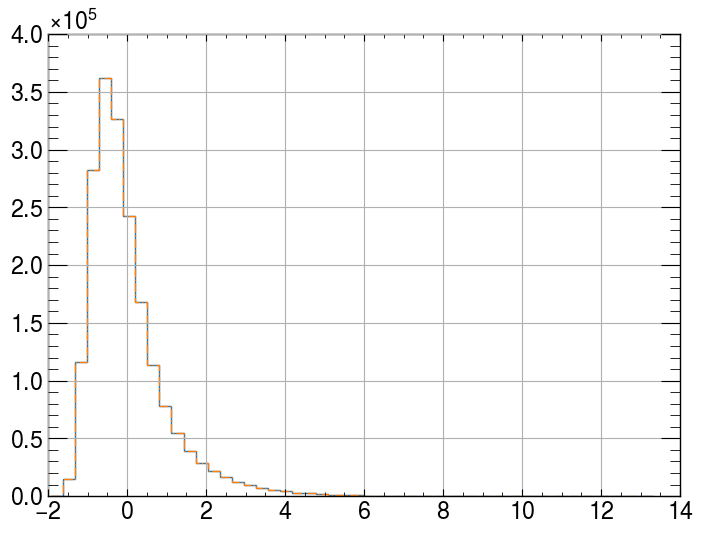

In [52]:
df_test['m_hh'].hist(histtype='step',bins=50,label = 'mine')
_ = plt.hist(scaled[:, 1], histtype='step',bins=50, label ='sklearn', ls='-.')

In [33]:
scaled

array([[-0.50548717,  0.86239688, -0.66818691, ...,  0.28957594,
         0.27261274, -1.41031978],
       [-0.50548717, -1.31671305,  1.04691312, ..., -0.52282669,
        -1.28800945,  1.05387929],
       [-0.50548717, -0.85510789, -0.87672544, ...,  0.97721878,
         1.05592044,  0.39004192],
       ...,
       [-0.50548717, -1.14763827, -0.89631916, ...,  0.18218557,
         0.28927611,  1.6869358 ],
       [-0.50548717,  0.15762351, -0.46501417, ..., -0.37265465,
         0.26933787,  0.00718931],
       [ 1.24259302, -0.91442875,  0.39306048, ...,  0.05521842,
         1.30193442,  1.39016191]])

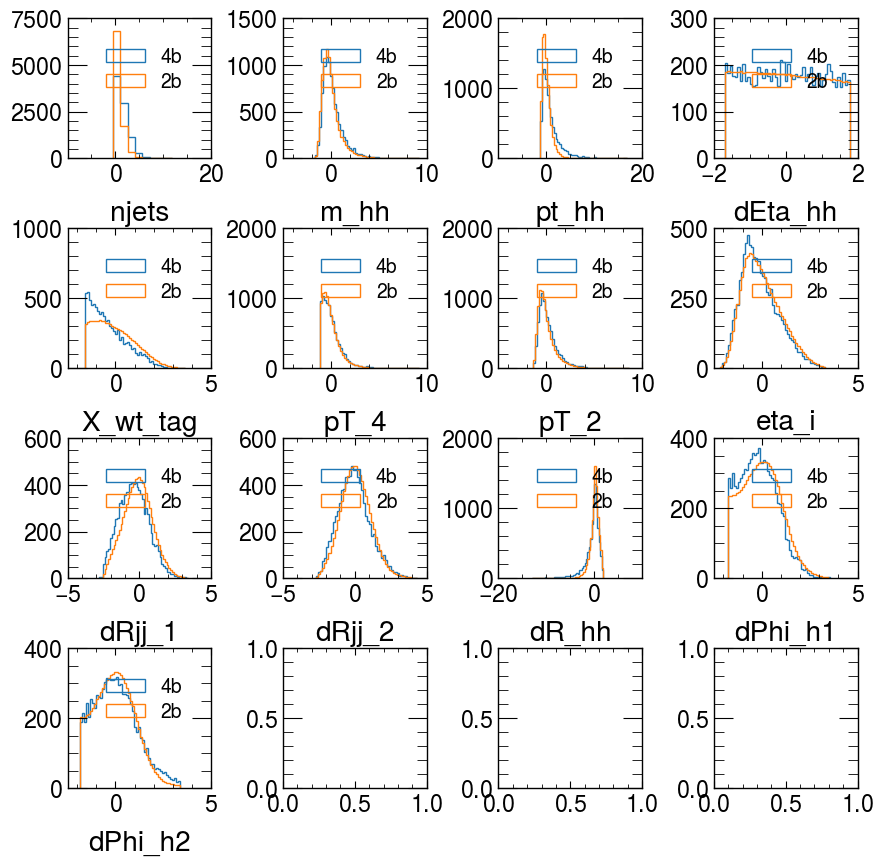

In [77]:
f, ax = plt.subplots(4,4, figsize = (10, 10))
ax= ax.ravel()
emds = []
for i, (feature, nb, hr) in enumerate(zip(features, nbins, hrange)):
    h4b, be,_ = ax[i].hist(df_test.loc[mask_4b & mask_cr, feature].values, bins=nb, histtype='step', label = '4b')
    N4b = np.sum(h4b)
    N2b = df_test.loc[mask_2b & mask_cr].shape[0]
    R = N4b / N2b
    h2b, _, _ = ax[i].hist(
        df_test.loc[mask_2b & mask_cr, feature].values, bins=be, histtype='step', weights=R * np.ones(N2b),
        label = '2b'
    )
    ax[i].legend()
    ax[i].set_xlabel(feature)
    emds.append(wasserstein_distance(h4b, h2b))
plt.subplots_adjust(hspace=0.5, wspace = 0.5)

In [65]:
emds

[601.4652053133848,
 15.449045454292246,
 67.64121049159789,
 7.673798965429711,
 46.68537314687366,
 10.188295018867027,
 18.40998934847702,
 10.454663553560305,
 10.803118796892816,
 10.400161111163618,
 43.87386998827748,
 17.096113757629666,
 13.183114584683544]

In [61]:
features

['njets',
 'm_hh',
 'pt_hh',
 'dEta_hh',
 'X_wt_tag',
 'pT_4',
 'pT_2',
 'eta_i',
 'dRjj_1',
 'dRjj_2',
 'dR_hh',
 'dPhi_h1',
 'dPhi_h2']

In [57]:
emds_dict={f:e for f, e in zip(features, emds)}

In [58]:
W = pd.DataFrame({"emd":emds_dict}, index=emds_dict.keys())

In [69]:
W.sort_values(by='emd', ascending=False)

emd
njets     601.465205
pt_hh      67.641210
X_wt_tag   46.685373
dR_hh      43.873870
pT_2       18.409989
dPhi_h1    17.096114
m_hh       15.449045
dPhi_h2    13.183115
dRjj_1     10.803119
eta_i      10.454664
dRjj_2     10.400161
pT_4       10.188295
dEta_hh     7.673799

In [71]:
W.index

Index(['njets', 'm_hh', 'pt_hh', 'dEta_hh', 'X_wt_tag', 'pT_4', 'pT_2',
       'eta_i', 'dRjj_1', 'dRjj_2', 'dR_hh', 'dPhi_h1', 'dPhi_h2'],
      dtype='object')

In [72]:
W.sort_values(by='emd', ascending=False, inplace=True)

Text(0.5, 1.0, 'EMD between 2b and 4b')

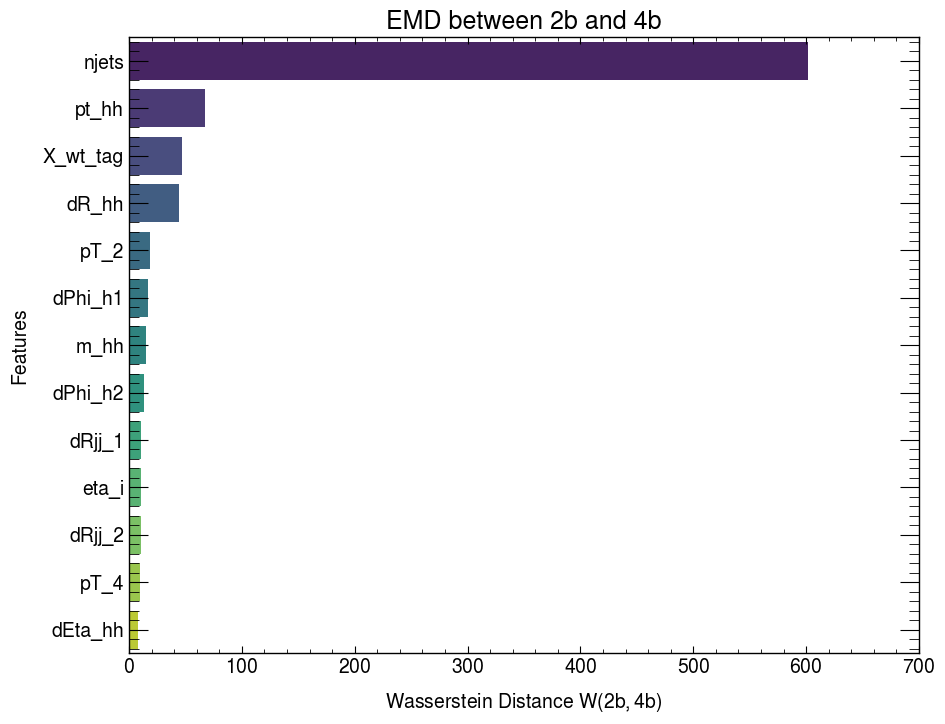

In [73]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    x='emd',
    y=W.index,
    palette="viridis",
    ax=ax,
    data=W
)
ax.set_ylabel("Features", fontsize=14)
ax.set_xlabel("Wasserstein Distance $W(2b, 4b)$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.set_title('EMD between 2b and 4b', fontsize=18)


In [106]:
W.drop(index='njets')

emd
m_hh      14.901101
pt_hh     63.844268
dEta_hh    7.728417
X_wt_tag  46.699351
pT_4       9.772541
pT_2      13.755667
eta_i     11.161271
dRjj_1    11.141734
dRjj_2     9.861289
dR_hh     43.898779
dPhi_h1   17.002427
dPhi_h2    7.110278

Text(0.5, 1.0, 'EMD between 2b and 4b')

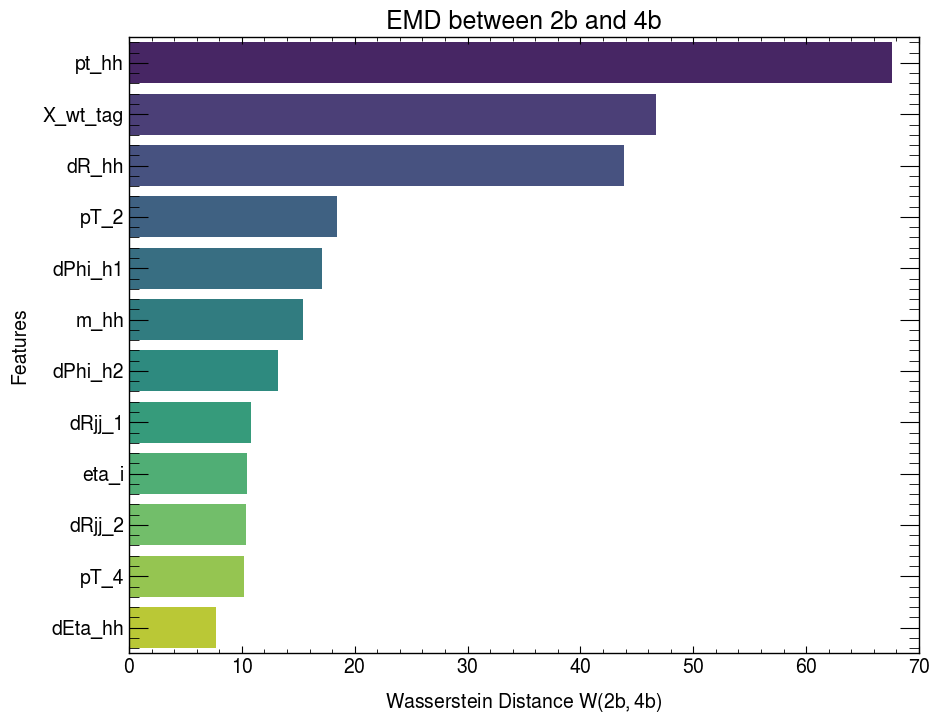

In [75]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    x='emd',
    y=W.drop(index='njets').sort_values(by='emd', ascending=False).index,
    palette="viridis",
    ax=ax,
    data=W.drop(index='njets').sort_values(by='emd', ascending=False)
)
ax.set_ylabel("Features", fontsize=14)
ax.set_xlabel("Wasserstein Distance $W(2b, 4b)$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.set_title('EMD between 2b and 4b', fontsize=18)


#### 

In [76]:
emds = []

for feature in features:
    h4b, be = np.histogram(df_16.loc[mask_4b & mask_cr, feature].values, bins=50)
    N4b = np.sum(h4b)
    N2b = df_16.loc[mask_2b & mask_cr].shape[0]
    R = N4b / N2b
    h2b, _ = np.histogram(
        df_16.loc[mask_2b & mask_cr, feature].values, bins=be, weights=R * np.ones(N2b)
    )

    emds.append(wasserstein_distance(h4b, h2b))

In [27]:
np.sum(mask_2b & mask_cr)

992357

In [28]:
(mask_2b & mask_cr).value_counts()

True     992357
False    923176
dtype: int64

In [47]:
emds_dict={f:e for f, e in zip(features, emds)}

In [48]:
emds_dict

{'m_hh': 15.449045454292246,
 'pt_hh': 67.64121049159789,
 'dEta_hh': 7.673798965429711,
 'X_wt_tag': 46.685373146873665,
 'pT_4': 10.188295018867027,
 'pT_2': 18.40998934847702,
 'eta_i': 10.454663553560305,
 'dRjj_1': 10.80347641013079,
 'dRjj_2': 10.400518724401593}

In [42]:
features

['njets',
 'm_hh',
 'pt_hh',
 'dEta_hh',
 'X_wt_tag',
 'pT_4',
 'pT_2',
 'eta_i',
 'dRjj_1',
 'dRjj_2']

In [19]:
for col in df_16.columns:
    print(col)

run_number
event_number
pass_vbf_sel
mc_sf
trig_sf
jet_trig_sfs
truth_mhh
ntag
njets
kinematic_region
m_min_dj
m_max_dj
pairing_score_1
pairing_score_2
bkt_lead_jet_pt
bkt_lead_jet_tag
second_jet_pt
second_jet_tag
third_jet_pt
third_jet_tag
fourth_jet_pt
fourth_jet_tag
bkt_HT
bucket_passed
cos_theta_star
m_hh_cor
m_hh
pt_hh
dEta_hh
X_wt_tag
X_wt_notag
X_wt_nonHCWjets
trig_bucket
m_h1
E_h1
pT_h1
eta_h1
phi_h1
m_h2
E_h2
pT_h2
eta_h2
phi_h2
m_h1_j1
E_h1_j1
pT_h1_j1
eta_h1_j1
phi_h1_j1
tag_h1_j1
quantile_h1_j1
angle_h1_j1
m_h1_j2
E_h1_j2
pT_h1_j2
eta_h1_j2
phi_h1_j2
tag_h1_j2
quantile_h1_j2
angle_h1_j2
m_h2_j1
E_h2_j1
pT_h2_j1
eta_h2_j1
phi_h2_j1
tag_h2_j1
quantile_h2_j1
angle_h2_j1
m_h2_j2
E_h2_j2
pT_h2_j2
eta_h2_j2
phi_h2_j2
tag_h2_j2
quantile_h2_j2
angle_h2_j2
pT_4
pT_2
eta_i
dRjj_1
dRjj_2
m_vbf_j1
E_vbf_j1
pT_vbf_j1
eta_vbf_j1
phi_vbf_j1
tagged_vbf_j1
m_vbf_j2
E_vbf_j2
pT_vbf_j2
eta_vbf_j2
phi_vbf_j2
tagged_vbf_j2
vbf_mjj
vbf_dEtajj
vbf_pTvecsum
2b1j
2b2j
BKT_passed
BKT1_trigger
BKT2_t